# K-Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

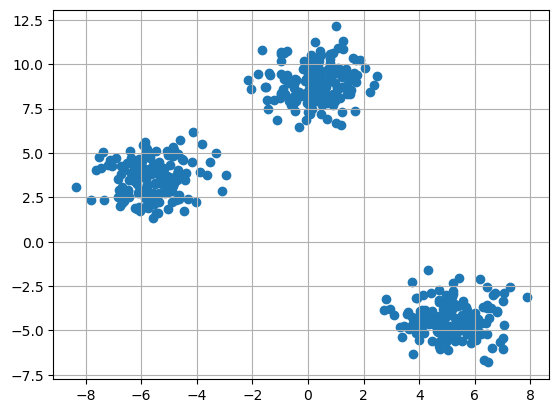

In [3]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [4]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

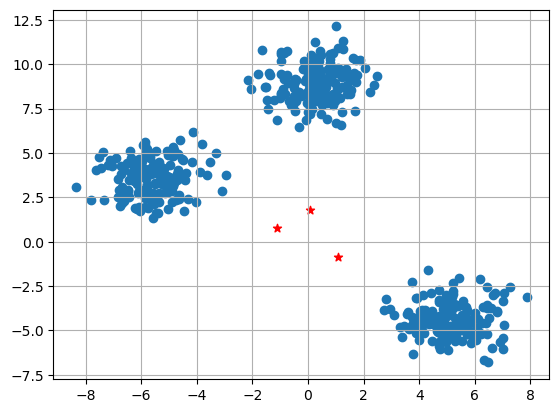

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [6]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [7]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [8]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


In [9]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

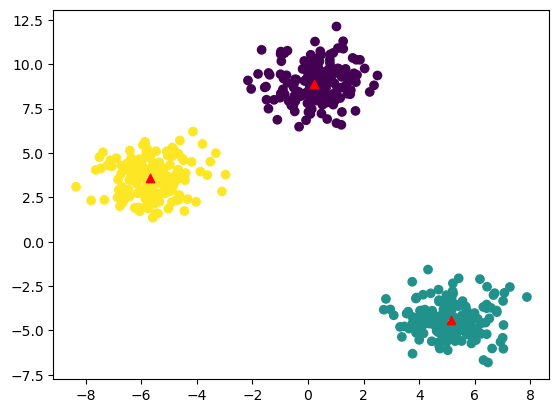

In [10]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

# IRIS dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [12]:
X, y = load_iris(return_X_y=True)

In [13]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

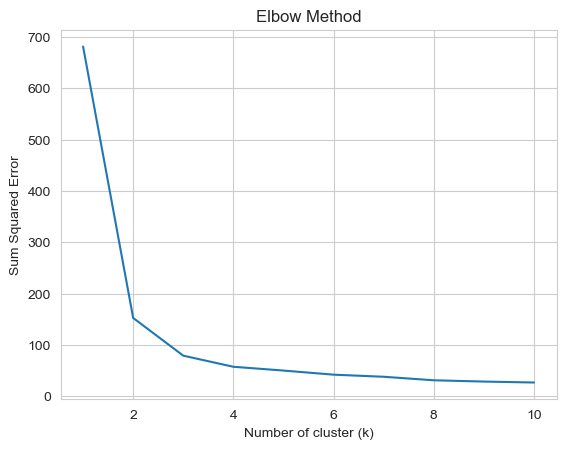

In [14]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()


In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
pred = kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

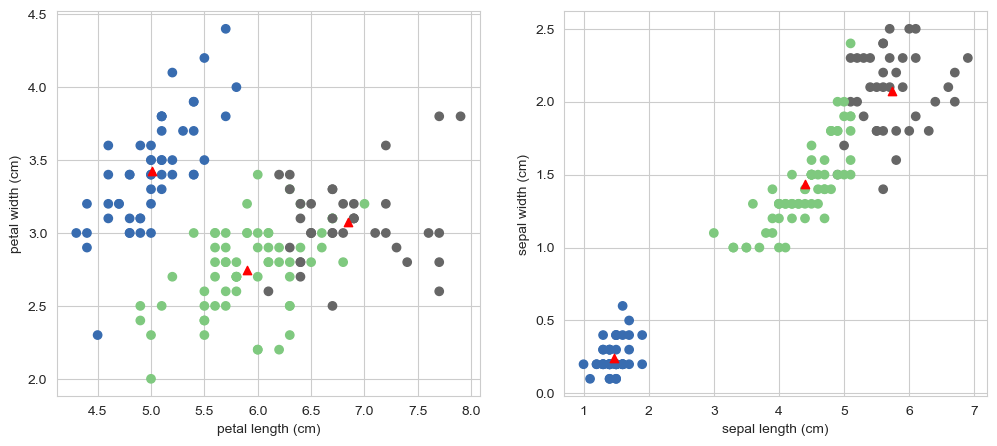

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()


# Hierarchical Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# randomly chosen dataset
# X = np.array([[1, 2], [1, 4], [1, 0],
# 			[4, 2], [4, 4], [4, 0]])
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

# print the class labels
print(clustering.labels_)


[0 0 0 1 0 0 2 1 2 2 2 2 0 0 0 0 0 2 0 1 2 1 2 2 2 0 2 0 2 1 2 2 2 2 1 1 1
 0 2 1 2 2 1 1 2 2 1 0 0 0 1 2 2 0 2 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 2 1 1 1 1 2 0 2 0 2 2 1 2 0 1 0 2 1 2 2 2 1 1 0 0 1 2 0 0 2 1 2 1 1 0 0 2
 0 2 0 2 0 1 2 0 1 0 1 1 1 2 0 1 0 0 0 2 0 0 0 1 1 0 1 0 2 1 2 2 0 2 1 1 0
 0 0 2 0 2 0 2 0 0 1 2 1 0 1 1 0 1 1 0 1 0 1 0 2 1 2 0 1 0 2 0 2 0 2 1 0 2
 1 2 2 2 2 0 2 2 0 0 2 1 2 0 0 0 2 1 0 1 1 1 2 1 0 1 0 2 0 1 2 0 1 1 1 0 2
 2 0 1 2 0 0 1 0 1 2 0 1 1 1 0 1 2 0 0 2 2 1 0 0 1 0 1 1 2 1 1 0 2 0 2 2 0
 0 1 0 1 0 2 2 2 1 1 2 1 2 1 1 0 2 2 0 2 2 2 2 2 0 0 1 0 0 2 2 1 2 1 2 2 1
 1 0 0 2 1 1 2 0 1 0 2 2 1 0 0 1 1 0 1 2 0 0 1 0 1 2 0 0 1 1 0 1 1 1 2 2 2
 0 2 1 0 0 2 0 1 1 1 2 0 0 0 2 2 2 1 0 1 1 1 2 1 1 0 1 2 1 0 0 1 1 2 0 1 1
 2 2 0 1 1 1 2 2 0 2 0 2 2 1 0 0 0 2 2 2 0 0 2 2 1 2 0 1 0 1 2 1 1 1 0 0 2
 2 0 1 1 2 2 2 1 0 2 1 2 2 0 2 1 0 0 2 0 2 0 2 2 2 1 1 2 2 1 0 1 0 2 2 0 1
 2 2 1 2 2 0 2 0 1 1 1 0 1 0 1 0 2 2 1 0 0 0 2 2 1 2 2 2 0 1 0 0 1 0 1 2 1
 2 1 1 0 0 1 2 2 0 1 0 0 

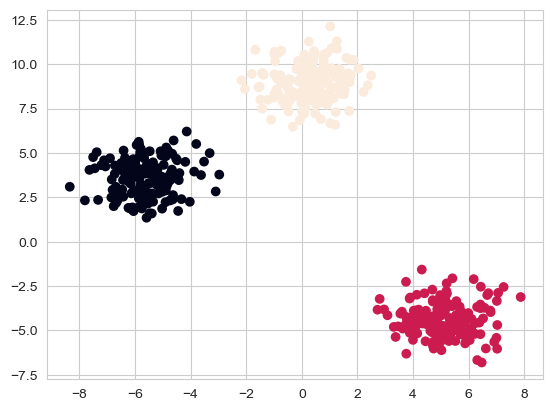

In [20]:
# X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1], c=clustering.labels_)
plt.show()

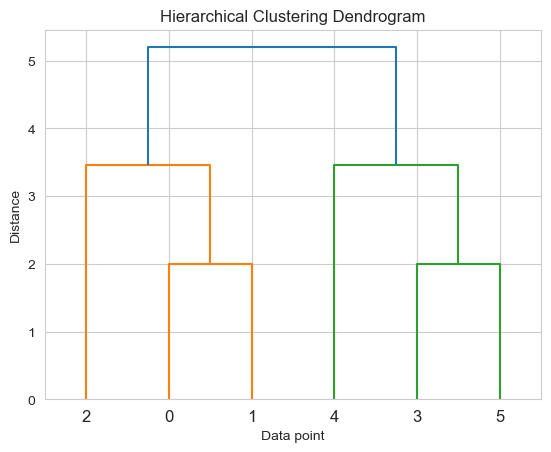

In [21]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Plot dendrogram
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()